<a href="https://colab.research.google.com/github/Jaiharish-passion07/Fourth_Capstone_Clustering_project/blob/master/INDIVIDUAL_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **# making some hypothissis from data visualized , commented code , proper output formating and 1 more eda  have to do this more things**

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import time
from datetime import datetime
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Clustering Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df=pd.DataFrame(df)

In [5]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Exploratory Data Analysis

In [6]:
df.shape

(7787, 12)

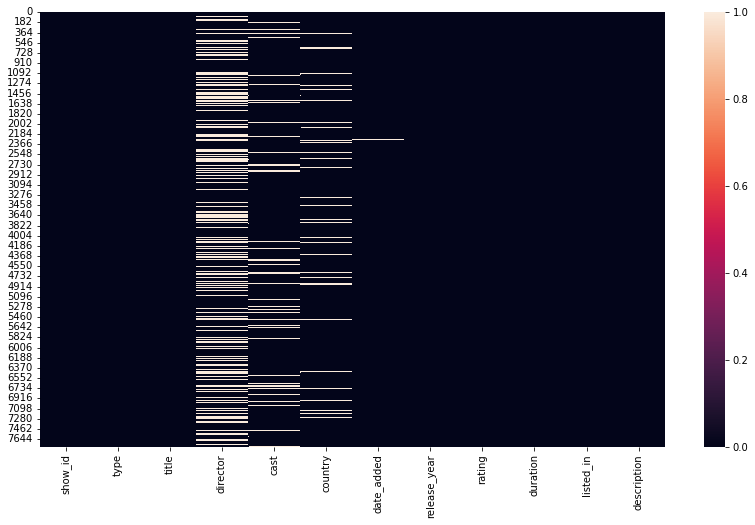

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isna())

In [8]:
df.drop(['director'],axis=1,inplace=True)
df_cleaned=df.dropna(subset=['cast','country','date_added','rating'],axis=0)

In [9]:
df_cleaned.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [10]:
df_cleaned['country']=df_cleaned['country'].apply(lambda x:x.split(","))

In [11]:
df_new=pd.DataFrame(columns=df_cleaned.columns)

In [12]:
indic=0
count=0
for index, row in df_cleaned.iterrows():
    if len(df_cleaned.loc[index,'country'])>1:
      count=len(df_cleaned.loc[index,'country'])+count
      for data in df_cleaned.loc[index,'country']:
        country_name=[]
        indic=indic+0
        country_name_list=list(df_cleaned.loc[index])
        country_name.append(data)
        country_name_list[4]=country_name
        df_new.loc[indic]=country_name_list
        indic=indic+1
      df_cleaned.drop(index,inplace=True)

In [13]:
df_cleaned.reset_index(drop=True,inplace=True)
df_clean_frame=df_cleaned.append(df_new,ignore_index=True)

In [14]:
df_clean_frame['country']=df_clean_frame['country'].apply(lambda x:x[0])
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:x.strip())
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:datetime.strptime(x,'%B %d, %Y'))
df_clean_frame['release_year']=df_clean_frame['release_year'].astype('int')

In [15]:
df_clean_frame.rename(columns={'type':'Type_of_show','title':'Title_of_Movie/show','cast':'Actors','date_added':'Date_Added_in_netflix','release_year':'Release_year','rating':'Ratings','listed_in':'Genre'},inplace=True)

In [16]:
df_clean_frame.drop([6361,6527],inplace=True)
df_clean_frame.reset_index(drop=True,inplace=True)

In [17]:
df_clean_frame.dtypes

show_id                          object
Type_of_show                     object
Title_of_Movie/show              object
Actors                           object
country                          object
Date_Added_in_netflix    datetime64[ns]
Release_year                      int64
Ratings                          object
duration                         object
Genre                            object
description                      object
dtype: object

In [18]:
df.tail()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


###1)Name the cast who has been acted more times only for Indian Movies
###2)Which top country using netfilx?
###3)At the Date of December 2020, what type of shows has been launced more and explore the highest rating of movie given to that month?


In [19]:
df_clean_frame.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [20]:
df_clean_frame.shape

(8262, 11)

1) Name the cast who has been acted more times only for Indian Movies

In [21]:
df_india=df_clean_frame.loc[df_clean_frame['country']=='India',:]

In [22]:
def stripping(x):
  datas=[]
  for i in x:
    datas.append(i.strip())
  return datas

In [23]:
df_india['Actors']=df_india['Actors'].apply(lambda x:x.split(','))
df_india['Actors']=df_india['Actors'].apply(lambda x:stripping(x))

In [24]:
actors_list=[]
for i in df_india['Actors']:
  actors_list.extend(i)
#actors_list=list(set(actors_list))

In [25]:
actors_df=pd.DataFrame(actors_list,columns=['Actors'])
actors_df=actors_df.value_counts().reset_index()
actors_df.rename(columns={0:'Count'},inplace=True)
actors_df.head(5)

,Actors,Count
0,Anupam Kher,39
1,Shah Rukh Khan,33
2,Naseeruddin Shah,29
3,Akshay Kumar,28
4,Om Puri,27


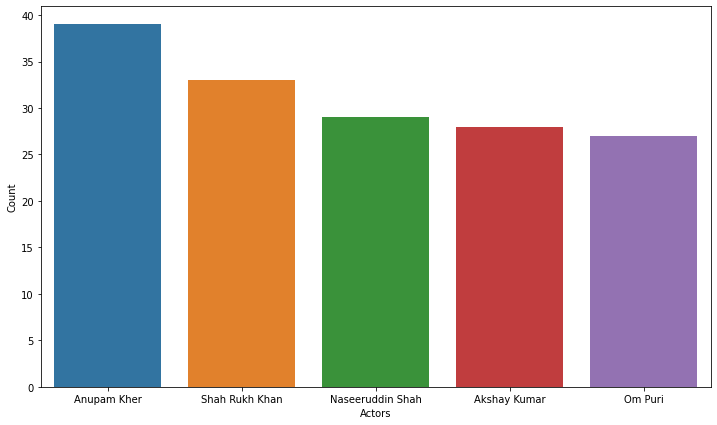

In [26]:
plt.figure(figsize=(12,7))
sns.barplot(x=actors_df['Actors'].head(5),y=actors_df['Count'].head(5))